# WUM 2024, projekt

Celem zadania jest statystyczna analiza danych znajdujących się w pliku dane_projekt1.csv.
Dane: Są to dane symulowane; opisują fragment wyników badania ankietowego dotyczącego zwyczajów
konsumenckich mieszkańców fikcyjnej krainy Bajtocji, przeprowadzonego na próbie reprezentatywnej*. Dane
mogą zawierać losowe błędy. Poniżej objaśnienie nazw zmiennych zastosowanych w badaniu:
- *id* – identyfikator obserwacji, nie zawiera żadnej dodatkowej informacji
- *waga* – waga respondenta (w kg)
- *wzrost* – wzrost respondenta (w cm)
- *plec* – płeć w dokumencie tożsamości respondenta (1 – “kobieta”, 2 – “mężczyzna”)
- *dzieci* – liczba dzieci na utrzymaniu respondenta (w osobach)
- *wiek* – wiek respondenta (w latach)
- *dochod* – deklarowany dochód respondenta w badanym miesiącu (w bajtalarach)
- *oszczednosci* – deklarowane oszczędności respondenta w badanym miesiącu (w bajtalarach, ujemne wartości oznaczają, że wydatki ogółem przekroczyły dochód)
- *jednoos* – status gospodarstwa domowego (1 – “gospodarstwo jednoosobowe”, 0 – “gospodarstwo wieloosobowe”)
- *miejsce* – wielkość miejscowości, w której mieszka respondent (1 – “do 10 000 mieszkańców”, 2 – “od 10 000 mieszkańców do 100 000 mieszkańców”, 3 – “powyżej 100 000 mieszkańców”)
- *wydatki_zyw* – deklarowane wydatki na żywność respondenta w badanym miesiącu (w bajtalarach).
Wynikiem ma być raport w notatniku jupyter (.ipynb). Raport i komentarze muszą być wystarczające
do zrozumienia i odtworzenia podejmowanych przez Państwa kroków bez konieczności czytania
Państwa kodów. Każde podjęte działanie modyfikujące w istotny sposób bazę (np. usuwanie rekordów,
modyfikacja i wprowadzanie nowych zmiennych) musi być uzasadnione i opisane. W każdym zadaniu można
skorzystać z gotowych implementacji. W moodle przedmiotu pojawi się zadanie – miejsce do przesłania
raportu. Raport oceniany będzie przez prowadzącego Państwa grupę.
Termin oddania: 8 maja 2024 23:59. Proszę zapoznać się z polityką dotyczącą spóźnień, opisaną w moodle
przedmiotu.
Suma punktów do zdobycia: 30

> Próba reprezentatywna to próba, której struktura ze względu na badane cechy (zmienne) jest zbliżona do struktury populacji statystycznej, z której pochodzi.

In [277]:
import pandas as pd

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

## Zadanie 1

### Wczytanie danych

> Wczytaj dane, obejrzyj je i podsumuj w dwóch-trzech zdaniach.

In [278]:
data = pd.read_csv("dane_projekt1.csv", sep=';')

data['plec'] = data['plec'].astype('category')
data['jednoos'] = data['jednoos'].astype('category')
data['miejsce'] = data['miejsce'].astype('category')

### Liczba obserwacji i struktura zbioru danych

> - Ile jest obserwacji? Przedyskutuj strukturę zbioru danych: ile jest zmiennych > ilościowych, a ile jakościowych? Czy występują braki danych? (1pkt)

In [279]:
negative_expenses_rows_count = data[data['wydatki_zyw'] < 0].shape[0]

print(f'Liczba wszystkich obserwacji: {data.shape[0]}')
print(f"Liczba wierszy z ujemnymi wydatkami: {negative_expenses_rows_count}")
data = data.drop(data[data['wydatki_zyw'] < 0].index) # wydatki_zyw nie mogą być ujemne
print("Data info")
print(data.info())

Liczba wszystkich obserwacji: 310
Liczba wierszy z ujemnymi wydatkami: 6
Data info
<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 309
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            304 non-null    int64   
 1   waga          304 non-null    float64 
 2   wzrost        304 non-null    float64 
 3   plec          304 non-null    category
 4   dzieci        304 non-null    int64   
 5   wiek          304 non-null    int64   
 6   dochod        304 non-null    float64 
 7   oszczednosci  304 non-null    float64 
 8   jednoos       304 non-null    category
 9   miejsce       304 non-null    category
 10  wydatki_zyw   304 non-null    float64 
dtypes: category(3), float64(5), int64(3)
memory usage: 22.6 KB
None


W zbiorze danych znajduje się 7 zmiennych ilościowych:
- waga
- wzrost
- dzieci
- wiek
- dochod
- oszczednosci
- wydatki_zyw

Oraz 3 zmienne jakościowe:
- plec
- jednoos
- miejsce

id jest zmienną identyfikującą, więc nie jest brana pod uwagę w analizie.

Zbiór danych składa się z 310 obserwacji spośród których 6 ma ujemne wydatki na żywność, **które wykluczam z analizy**.

W danych nie występują braki danych.

> - Przedstaw i skomentuj zasadne tabele częstości lub statystykę opisową dla zmiennych w zbiorze danych (zwróć uwagę na typ zmiennych). (1pkt)

> - Przedstaw i skomentuj zasadne tabele częstości lub statystykę opisową dla zmiennych w zbiorze danych
(zwróć uwagę na typ zmiennych). (1pkt)

### Przedstawienie danych

> - Przedstaw i skomentuj (tam, gdzie zasadne) rozkłady zmiennych, w szczególności porównując je wizualnie z rozkładem normalnym (np. z wykorzystaniem histogramów, wykresów kwantyl-kwantyl, etc). (2pkt)

#### Zmienne ilościowe

In [280]:
fig = go.Figure(data=[go.Table(
    header=dict(values=[''] + list(data.drop(columns=['id']).describe().columns),
                fill_color='orchid',
                align='left'),
    cells=dict(values=[data.drop(columns=['id']).describe().index] + [data.drop(columns=['id']).describe()[col] for col in data.drop(columns=['id']).describe().columns],
               fill_color='lavender',
               align='left'))
]).update_layout(title='Data description')
fig.update_layout(width=1500, height=400)
fig.show()

#### Zmienne jakościowe

In [281]:
fig = go.Figure(data=[go.Table(
    header=dict(values=[''] + list(data[['plec', 'jednoos', 'miejsce']].describe().columns),
                fill_color='orchid',
                align='left'),
    cells=dict(values=[data[['plec', 'jednoos', 'miejsce']].describe().index] + [data[['plec', 'jednoos', 'miejsce']].describe()[col] for col in data[['plec', 'jednoos', 'miejsce']].describe().columns],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(width=1500, height=300)
fig.show()

#### Histogramy

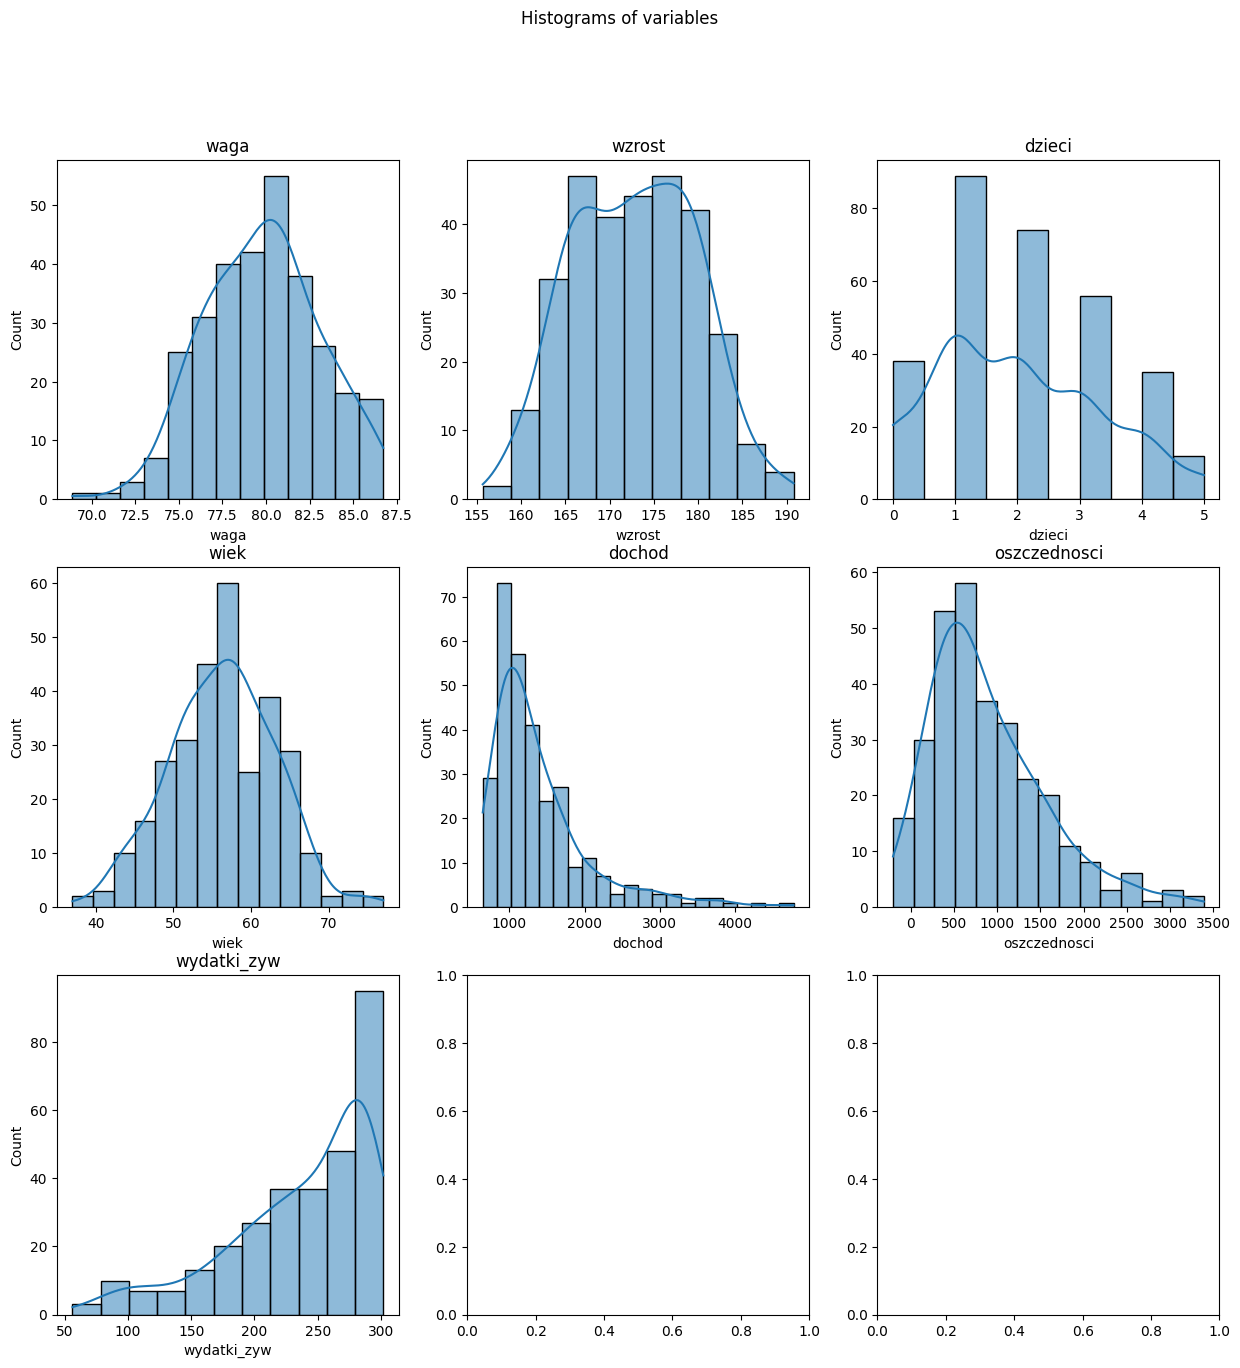

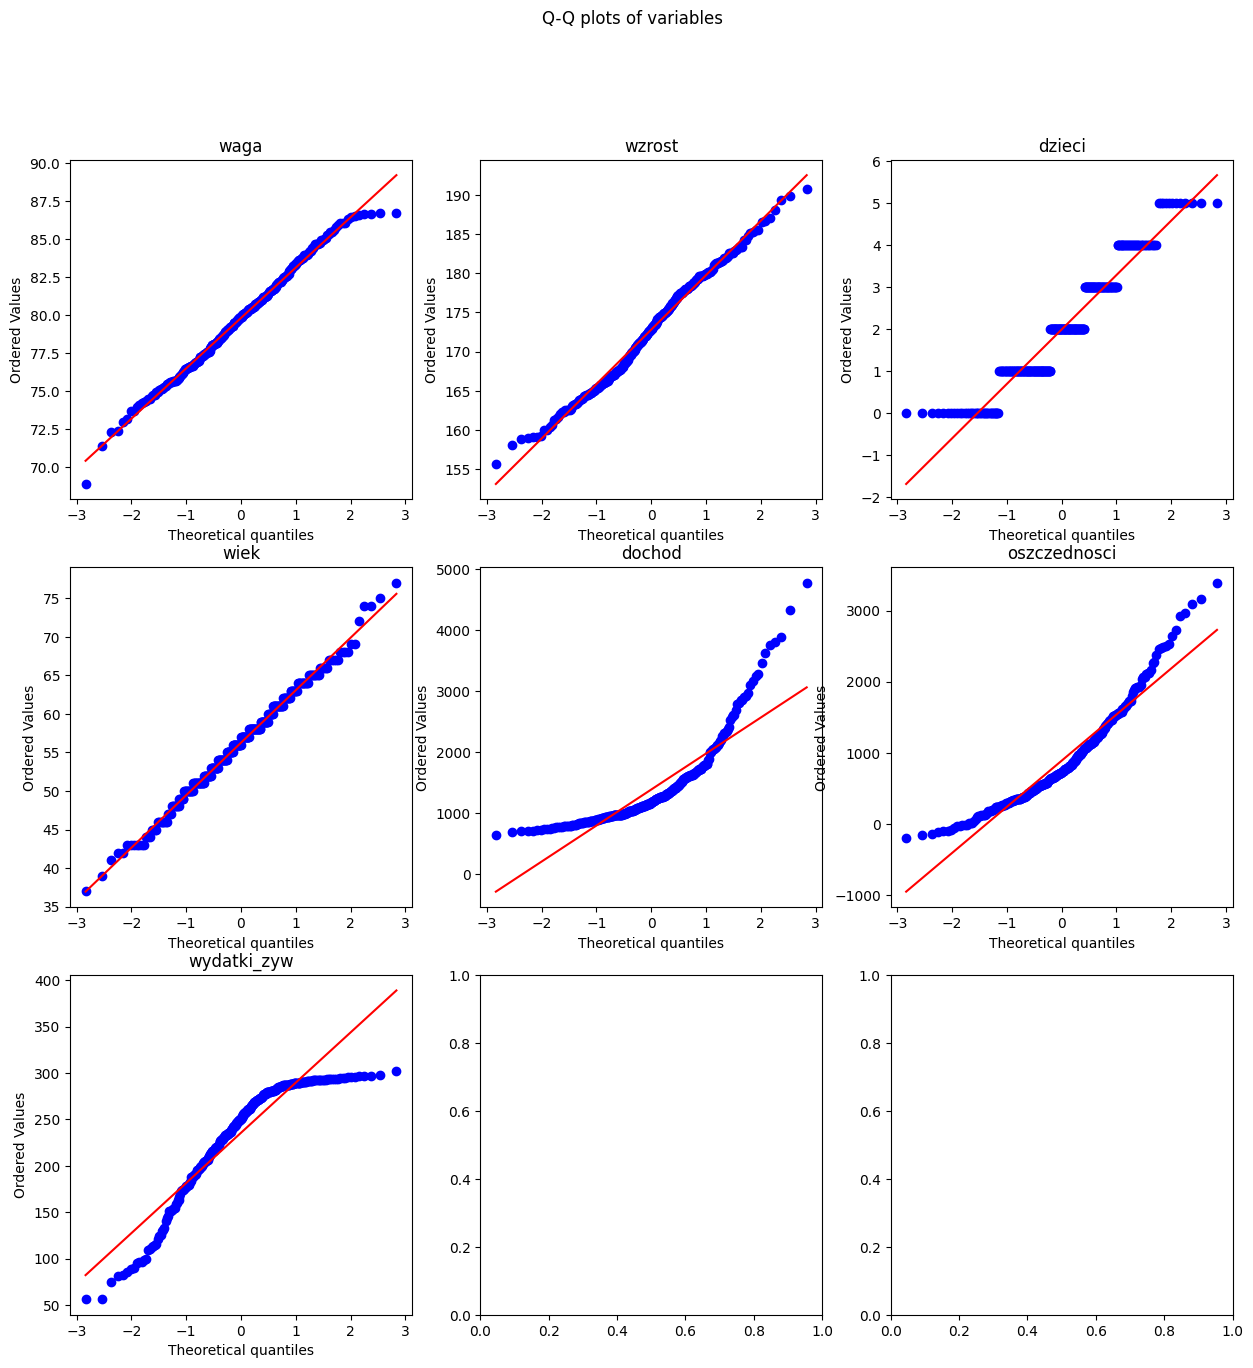

In [282]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Histograms of variables')
sns.histplot(data['waga'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('waga')
sns.histplot(data['wzrost'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('wzrost')
sns.histplot(data['dzieci'], kde=True, ax=axs[0, 2])
axs[0, 2].set_title('dzieci')
sns.histplot(data['wiek'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('wiek')
sns.histplot(data['dochod'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('dochod')
sns.histplot(data['oszczednosci'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('oszczednosci')
sns.histplot(data['wydatki_zyw'], kde=True, ax=axs[2, 0])
axs[2, 0].set_title('wydatki_zyw')
plt.show()


fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Q-Q plots of variables')
stats.probplot(data['waga'], dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('waga')
stats.probplot(data['wzrost'], dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('wzrost')
stats.probplot(data['dzieci'], dist="norm", plot=axs[0, 2])
axs[0, 2].set_title('dzieci')
stats.probplot(data['wiek'], dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('wiek')
stats.probplot(data['dochod'], dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('dochod')
stats.probplot(data['oszczednosci'], dist="norm", plot=axs[1, 2])
axs[1, 2].set_title('oszczednosci')
stats.probplot(data['wydatki_zyw'], dist="norm", plot=axs[2, 0])
axs[2, 0].set_title('wydatki_zyw')
plt.show()


### Komentarz do rozkładów zmiennych

#### Waga:

- **Histogram**: Rozkład wagi przypomina rozkład normalny - jest unimodalny, symetryczny i skupiony wokół średniej. Niewielkie odchylenia od idealnego rozkładu normalnego można zaobserwować na krańcach rozkładu, gdzie obserwujemy nieco więcej obserwacji niż w teoretycznym rozkładzie normalnym.
- **Wykres Q-Q**: Potwierdza obserwacje z histogramu - punkty układają się wzdłuż linii prostej, co wskazuje na dobrą zgodność z rozkładem normalnym. Niewielkie odchylenia występują na krańcach rozkładu, co sugeruje nieco "cięższe ogony" niż w rozkładzie normalnym.

#### Wzrost:

- **Histogram**: Podobnie jak waga, rozkład wzrostu przypomina rozkład normalny - jest unimodalny, symetryczny i skupiony wokół średniej.
- **Wykres Q-Q**: Potwierdza zgodność z rozkładem normalnym - punkty układają się wzdłuż linii prostej.

#### Dzieci:

- **Histogram**: Rozkład liczby dzieci jest dyskretny i skośny w prawo. Najwięcej osób ma 1 lub 2 dzieci, a liczba obserwacji spada wraz ze wzrostem liczby dzieci.
- **Wykres Q-Q**: Punkty wyraźnie odbiegają od linii prostej, co potwierdza brak zgodności z rozkładem normalnym.

#### Wiek:

- **Histogram**: Rozkład wieku jest unimodalny i lekko skośny w lewo.
- **Wykres Q-Q**: Punkty układają się wzdłuż linii prostej z wyjątkiem kilku obserwacji na krańcach rozkładu. Sugeruje to niewielkie odchylenia od rozkładu normalnego, głównie ze względu na skośność.

#### Dochód:

- **Histogram**: Rozkład dochodu jest skośny w prawo. Większość obserwacji skupia się w niższych wartościach dochodu, a liczba obserwacji maleje wraz ze wzrostem dochodu.
- **Wykres Q-Q**: Punkty odbiegają od linii prostej, szczególnie w górnym kwantylu. Potwierdza to brak zgodności z rozkładem normalnym.

#### Oszczędności:

- **Histogram**: Rozkład oszczędności jest skośny w prawo. Podobnie jak w przypadku dochodu, obserwujemy skupienie obserwacji w niższych wartościach i spadek liczby obserwacji wraz ze wzrostem oszczędności.
- **Wykres Q-Q**: Punkty odbiegają od linii prostej, potwierdzając brak zgodności z rozkładem normalnym.

#### Podsumowanie:

Rozkłady wagi i wzrostu są zbliżone do rozkładu normalnego. Rozkład dzieci jest dyskretny i skośny. Rozkłady wieku, dochodu i oszczędności są unimodalne i skośne w lewo lub prawo, co wskazuje na brak zgodności z rozkładem normalnym.

## Zadanie 2

> Sprawdź, czy występują pomiędzy zmiennymi zależności. Policz i zaprezentuj na wykresie typu mapa ciepła (heatmap) zasadny współczynnik korelacji pomiędzy zmiennymi ilościowymi, a także zbadaj zależność zmiennych jakościowych. Skomentuj wyniki ze szczególnym uwzględnieniem kwestii istotności statystycznej. (3pkt)

### Zależności między zmiennymi ilościowymi

#### Mapa ciepła

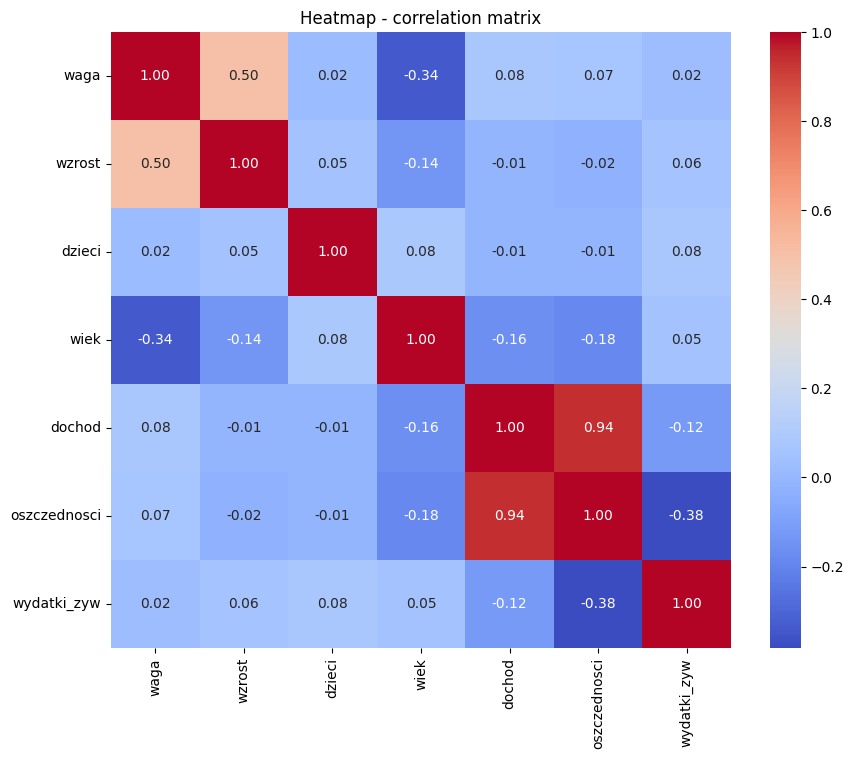

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
quantitative_variables = ['waga', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci', 'wydatki_zyw']
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['id'])[quantitative_variables].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap - correlation matrix')
plt.show()

#### Analiza zależności między zmiennymi

- **Silna dodatnia korelacja**:
  - Dochód i oszczędności (0.94): Osoby z wyższymi dochodami mają tendencję do posiadania większych oszczędności. To logiczne i oczekiwane.
  - Oszczędności i jednoosobowe gospodarstwo domowe (0.76): Podobnie jak wyżej, osoby mieszkające samotnie wydają się mieć więcej oszczędności.
- **Umiarkowana dodatnia korelacja**:
  - Waga i wzrost (0.50): Wyżsi ludzie mają tendencję do bycia cięższymi. To również logiczne, choć zależność nie jest bardzo silna.
- **Słaba korelacja lub jej brak**:
  - Wiek i dochód (-0.16): Starsi ludzie mogą mieć niższe dochody (np. emerytura).
  - Wiek i oszczędności (-0.18): Starsi ludzie mogą mieć mniejsze oszczędności ze względu na wydatki związane z wiekiem (np. leczenie).
  - Wydatki na żywność i oszczędności (-0.38): Osoby, które więcej wydają na żywność, mają mniejsze oszczędności.

#### Istotność statystyczna:

In [284]:
from scipy.stats import pearsonr

variables = ['waga', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci', 'wydatki_zyw']

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            correlation, p_value = pearsonr(data[var1], data[var2])
            print(f"Korelacja między {var1} a {var2}: {correlation:.2f}, p-value: {p_value:.3f}")

Korelacja między waga a wzrost: 0.50, p-value: 0.000
Korelacja między waga a dzieci: 0.02, p-value: 0.708
Korelacja między waga a wiek: -0.34, p-value: 0.000
Korelacja między waga a dochod: 0.08, p-value: 0.186
Korelacja między waga a oszczednosci: 0.07, p-value: 0.248
Korelacja między waga a wydatki_zyw: 0.02, p-value: 0.695
Korelacja między wzrost a waga: 0.50, p-value: 0.000
Korelacja między wzrost a dzieci: 0.05, p-value: 0.365
Korelacja między wzrost a wiek: -0.14, p-value: 0.018
Korelacja między wzrost a dochod: -0.01, p-value: 0.851
Korelacja między wzrost a oszczednosci: -0.02, p-value: 0.699
Korelacja między wzrost a wydatki_zyw: 0.06, p-value: 0.308
Korelacja między dzieci a waga: 0.02, p-value: 0.708
Korelacja między dzieci a wzrost: 0.05, p-value: 0.365
Korelacja między dzieci a wiek: 0.08, p-value: 0.140
Korelacja między dzieci a dochod: -0.01, p-value: 0.816
Korelacja między dzieci a oszczednosci: -0.01, p-value: 0.800
Korelacja między dzieci a wydatki_zyw: 0.08, p-value:

Analizując wartości p-value, możemy stwierdzić, że następujące zależności są statystycznie istotne (przyjmując poziom istotności α = 0.05):
- **Waga i wzrost**: p-value = 0.000 < 0.05 - Istnieje istotna dodatnia korelacja między wagą a wzrostem.
- **Waga i wiek**: p-value = 0.000 < 0.05 - Istnieje istotna ujemna korelacja między wagą a wiekiem.
- **Wzrost i wiek**: p-value = 0.018 < 0.05 - Istnieje istotna ujemna korelacja między wzrostem a wiekiem.
- **Dochód i oszczędności**: p-value = 0.000 < 0.05 - Istnieje bardzo silna istotna dodatnia korelacja między dochodem a oszczędnościami.
- **Wiek i dochód**: p-value = 0.004 < 0.05 - Istnieje istotna ujemna korelacja między wiekiem a dochodem.
- **Wiek i oszczędności**: p-value = 0.001 < 0.05 - Istnieje istotna ujemna korelacja między wiekiem a oszczędnościami.
- **Wydatki na żywność i oszczędności**: p-value = 0.000 < 0.05 - Istnieje istotna ujemna korelacja między wydatkami na żywność a oszczędnościami.
- **Wydatki na żywność i dochód**: p-value = 0.035 < 0.05 - Istnieje istotna ujemna korelacja między wydatkami na żywność a dochodem.

Pozostałe zależności nie są statystycznie istotne na poziomie istotności α = 0.05.


#### Wnioski:


Testy t-Studenta potwierdzają obserwacje z mapy ciepła i dodatkowo pokazują, że korelacja między wydatkami na żywność a dochodem jest również istotna statystycznie.

### Zależności między zmiennymi jakościowymi

#### Mapa ciepła

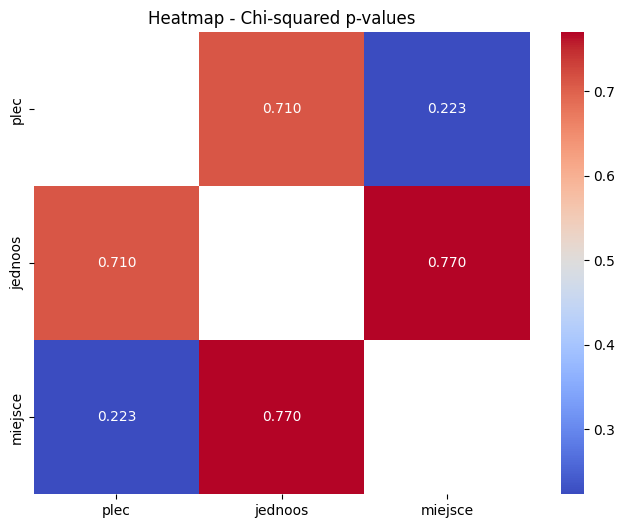

In [285]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi2_heatmap(data, categorical_vars):
    chi2_results = pd.DataFrame(index=categorical_vars, columns=categorical_vars)
    
    for var1 in categorical_vars:
        for var2 in categorical_vars:
            if var1 != var2:
                contingency_table = pd.crosstab(data[var1], data[var2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                chi2_results.loc[var1, var2] = p
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(chi2_results.astype(float), annot=True, fmt=".3f", cmap='coolwarm')
    plt.title('Heatmap - Chi-squared p-values')
    plt.show()

categorical_vars = ['plec', 'jednoos', 'miejsce']
chi2_heatmap(data, categorical_vars)

#### Analiza zależności między zmiennymi


**Brak istotnych zależności**: Żadna z wartości p-value nie jest mniejsza niż 0.05 (przyjęty poziom istotności). Oznacza to, że nie ma statystycznie istotnych zależności między analizowanymi zmiennymi jakościowymi.

## Zadanie 3

> Podsumuj dane przynajmniej trzema różnymi wykresami (skomentuj każdy z wykresów). Podstawowy zestaw wykresów zawiera:
> - Wykresy rozrzutu (scatter-plot) dla wszystkich zmiennych ilościowych względem zmiennej wydatki_zyw.
> - Wykresy typu pudełkowy (boxplot) dla jednej wybranej zmiennej ilościowej w podziale na miejsce zamieszkania respondentów.
> - Wykres słupkowy skumulowany (stacked bar chart) dla płci respondenta i faktu, czy prowadzi jednoosobowe gospodarstwo domowe.
> 
> (3pkt, każdy wykres z podstawowego zestawu wart 1pkt: 0,25 pkt za sam wykres, 0,75pkt za komentarz w kontekście analizy eksploracyjnej. Mile widziane dodatkowe wykresy wg własnej inwencji uzupełniające analizę eksploracyjną, np. słupkowe, liniowe, kołowe... – możliwe dodanie do 1 dodatkowego punktu przez osobę sprawdzającą za interesujące dodatkowe wizualizacje)

### 1. Wykresy rozrzutu dla wszystkich zmiennych ilościowych względem zmiennej *wydatki_zyw*

####  Wykres

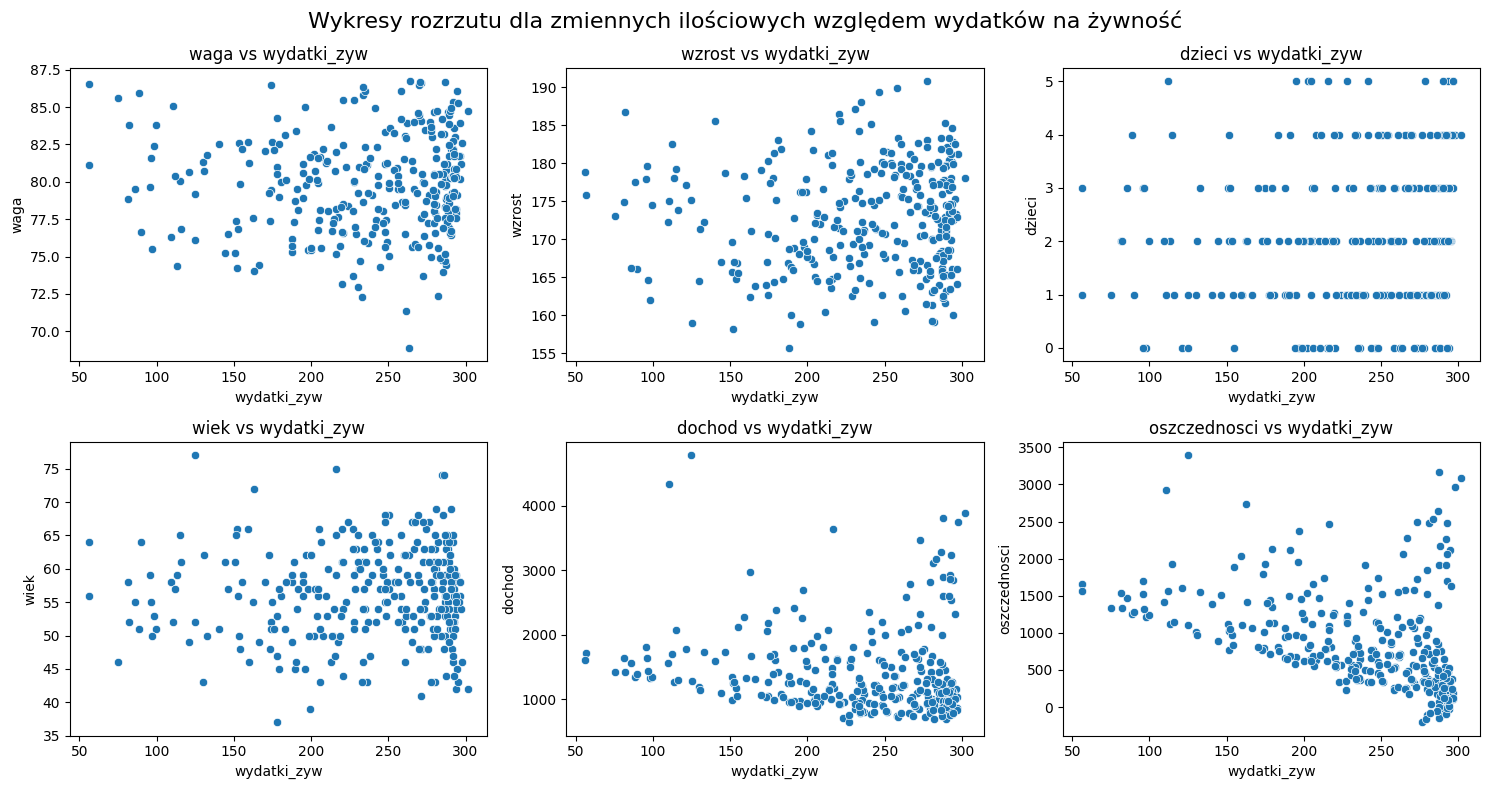

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

quantitative_vars = ['waga', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Wykresy rozrzutu dla zmiennych ilościowych względem wydatków na żywność', fontsize=16)

for i, var in enumerate(quantitative_vars):
    row = i // 3
    col = i % 3
    sns.scatterplot(x='wydatki_zyw', y=var, data=data, ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs wydatki_zyw')

plt.tight_layout()
plt.show()

#### Analiza

Analizując wykresy rozrzutu, możemy zauważyć kilka interesujących rzeczy:
- **Waga vs wydatki_zyw**: Nie widać wyraźnego trendu liniowego. Oznacza to, że waga prawdopodobnie nie ma silnego wpływu na wydatki na żywność.
- **Wzrost vs wydatki_zyw**: Podobnie jak w przypadku wagi, nie widać wyraźnej zależności liniowej.
- **Dzieci vs wydatki_zyw**: Możemy zaobserwować trend który może sugerować, że liczba dzieci może mieć wpływ na wydatki na żywność. Rodziny z większą ilością dzieci prawdopodobnie wydają więcej na żywność.
- **Wiek vs wydatki_zyw**: Wykres sugeruje, że może istnieć słaba ujemna korelacja. Osoby starsze wydają się nieco mniej na żywność. Może to wynikać z mniejszego zapotrzebowania kalorycznego lub zmiany diety.
- **Dochod vs wydatki_zyw** i **Oszczednosci vs wydatki_zyw** : Wykresy pokazują ujemną korelację Osoby z wyższymi dochodami i większymi oszczędnościami wydają mniej na żywność. Może to wynikać z oszczędnego stylu życia lub większej dbałości o budżet domowy.

#### Wnioski


Wykresy rozrzutu dają nam wstępny wgląd w zależności między wydatkami na żywność a innymi zmiennymi. Potwierdzają one niektóre z naszych wcześniejszych obserwacji dotyczących korelacji, a także ujawniają nowe, potencjalne zależności.

### 2. Wykresy typu pudełkowy (boxplot) dla zmiennej *oszczednosci* w podziale na populację miejscowości zamieszkania

#### Wykres

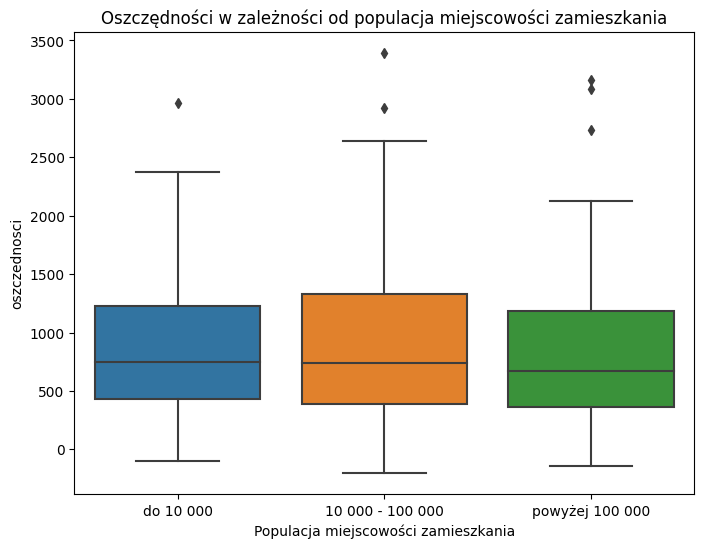

In [287]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='miejsce', y='oszczednosci', data=data)
plt.xticks(ticks=[0, 1, 2], labels=['do 10 000', '10 000 - 100 000', 'powyżej 100 000'])
plt.xlabel('Populacja miejscowości zamieszkania')
plt.title('Oszczędności w zależności od populacja miejscowości zamieszkania')
plt.show()

#### Analiza

Analizując wykres pudełkowy "Oszczędności w zależności od populacja miejscowości zamieszkania", możemy zauważyć kilka ciekawych rzeczy:
- Mediana oszczędności: Mediana oszczędności jest najwyższa w miejscowościach o populacji 10 000 - 100 000 mieszkańców. Oznacza to, że "typowy" mieszkaniec takiej miejscowości ma większe oszczędności niż mieszkańcy mniejszych lub większych miejscowości.
- Rozstęp danych: Rozstęp danych (różnica między wartością maksymalną a minimalną) jest największy w miejscowościach powyżej 100 000 mieszkańców. Sugeruje to, że w większych miastach występuje większe zróżnicowanie w poziomie oszczędności.
- Outliery: Na wykresie widzimy kilka outlierów - wartości znacznie odbiegających od pozostałych. Są one obecne we wszystkich trzech grupach, ale najwięcej outlierów występuje w miejscowościach powyżej 100 000 mieszkańców.

####  Wnioski


Wykres sugeruje, że miejsce zamieszkania może mieć wpływ na poziom oszczędności. Mieszkańcy średniej wielkości miast wydają się mieć największe oszczędności, podczas gdy w większych miastach występuje mniejsze zróżnicowanie.

### 3. Wykres słupkowy skumulowany (stacked bar chart) dla płci respondenta i faktu, czy prowadzi jednoosobowe gospodarstwo domowe.

#### Wykres

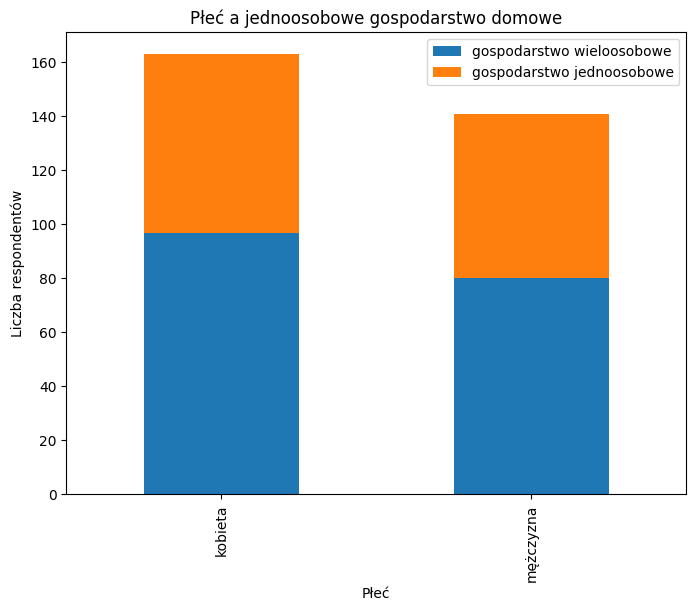

In [288]:
contingency_table = pd.crosstab(data['plec'], data['jednoos'])
contingency_table.index = ['kobieta', 'mężczyzna']
contingency_table.columns = ['gospodarstwo wieloosobowe', 'gospodarstwo jednoosobowe']
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Płeć a jednoosobowe gospodarstwo domowe')
plt.xlabel('Płeć')
plt.ylabel('Liczba respondentów')
plt.show()

#### Analiza

Analizując wykres "Płeć a jednoosobowe gospodarstwo domowe", możemy zauważyć, że:
- **W obu grupach dominują kobiety**: Zarówno wśród osób mieszkających w gospodarstwach wieloosobowych, jak i jednoosobowych, kobiety stanowią większość.
- **Gospodarstwa wieloosobowe**: W gospodarstwach wieloosobowych różnica między liczbą kobiet a mężczyzn jest mniejsza.
- **Gospodarstwa jednoosobowe**: W gospodarstwach jednoosobowych liczba kobiet jest wyraźnie wyższa niż liczba mężczyzn.

#### Wnioski:

Wykres wskazuje, że kobiety częściej niż mężczyźni mieszkają same. Może to wynikać z różnych czynników społecznych i ekonomicznych, takich jak: różnice w oczekiwanej długości życia, różnice w zarobkach, czy wzorce kulturowe.

### 4. Histogram wieku respondentów z podziałem na płeć (wykres dodatkowy)

#### Wykres

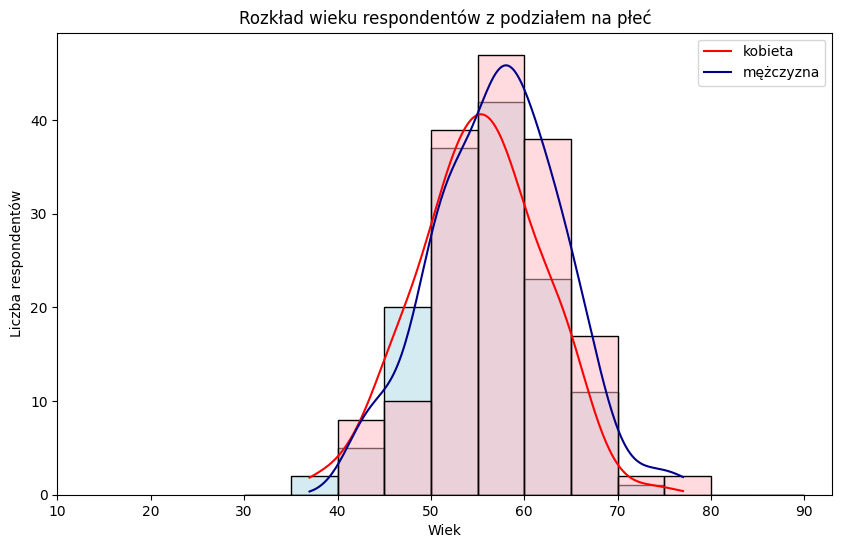

In [289]:
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=data, x='wiek', hue='plec', multiple='layer', kde=True, binwidth=5, binrange=(30, 90), palette={1:'lightpink', 2:'lightblue'}, hue_order=[1, 2])
histplot.get_lines()[0].set_color('red')
histplot.get_lines()[1].set_color('darkblue')

plt.legend(labels=['kobieta', 'mężczyzna'])
plt.title('Rozkład wieku respondentów z podziałem na płeć')
plt.xlabel('Wiek')
plt.xticks(np.arange(10, 100, 10))
plt.ylabel('Liczba respondentów')

plt.show()

#### Analiza

In [290]:
print(f'Liczba kobiet w wieku poniżej 40 lat: {data[(data["plec"] == 1) & (data["wiek"] < 40)].shape[0]}')
print(f'Liczba kobiet w wieku poniżej 50 lat: {data[(data["plec"] == 1) & (data["wiek"] < 50)].shape[0]}')

Liczba kobiet w wieku poniżej 40 lat: 0
Liczba kobiet w wieku poniżej 50 lat: 18


Możemy zauważyć kilka rzeczy:
- **Dominacja kobiet**: W większości przedziałów wiekowych liczba kobiet przewyższa liczbę mężczyzn.
- **Wiek kobiet**: Wśród respondentek nie ma kobiet młodszych niż 40 lat
- **Rozkład**: Rozkład wieku kobiet wydaje się być bardziej równomierny niż rozkład wieku mężczyzn.

#### Wnioski:


Histogram pokazuje, że w badanej grupie przeważają kobiety. Różnice w liczebności płci są widoczne w niemal każdym przedziale wiekowym.

Dodatkowo można zauważyć, że rozkład wieku kobiet jest bardziej równomierny, podczas gdy wśród mężczyzn występuje większe skupisko w przedziale 45-50 lat.

### 5. Wykres skrzypcowy dochodów w zależności od płci i typu gospodarstwa domowego (wykres dodatkowy)

#### Wykres

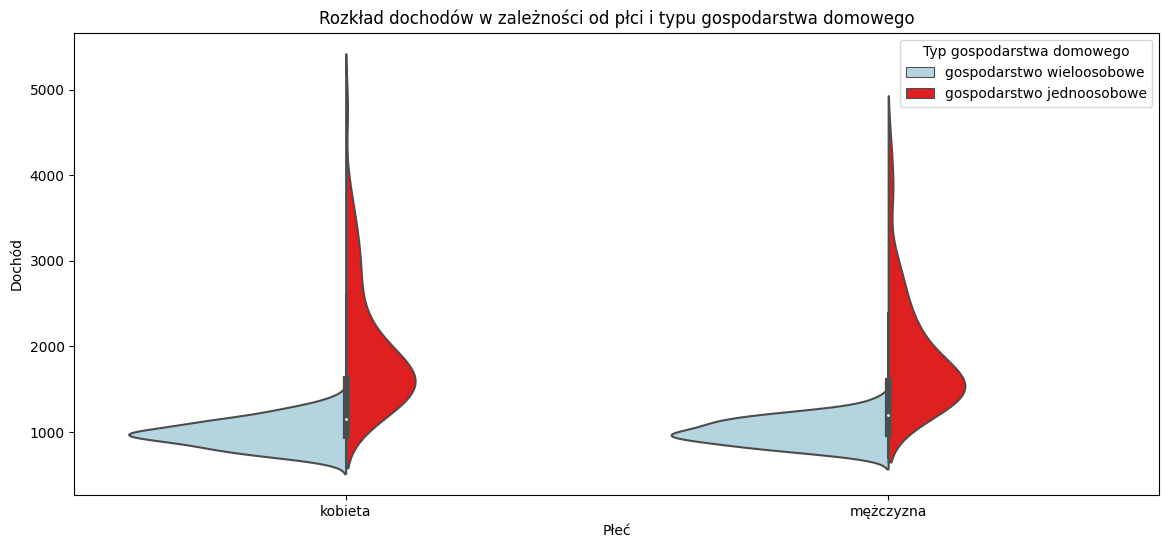

In [291]:
plt.figure(figsize=(14, 6))
mask = {0: 'gospodarstwo wieloosobowe', 1:'gospodarstwo jednoosobowe'}
sns.violinplot(x='plec', y='dochod', hue='jednoos', data=data.replace({'jednoos': mask}), split=True, palette={'gospodarstwo wieloosobowe': 'lightblue', 'gospodarstwo jednoosobowe': 'red'})
plt.title('Rozkład dochodów w zależności od płci i typu gospodarstwa domowego')
plt.xlabel('Płeć')
plt.xticks(ticks=[0, 1], labels=['kobieta', 'mężczyzna'])
plt.legend(title='Typ gospodarstwa domowego')

plt.ylabel('Dochód')
plt.show()

#### Analiza

Możemy zauważyć kilka interesujących rzeczy:
- **Gospodarstwa wieloosobowe**: Zarówno dla kobiet, jak i dla mężczyzn, mediana dochodów jest wyższa w gospodarstwach wieloosobowych. Może to wynikać z faktu, że w gospodarstwach wieloosobowych częściej występuje więcej niż jedna osoba zarabiająca.
- **Różnice w medianie**: Mediana dochodów jest wyższa dla mężczyzn niż dla kobiet, zarówno w gospodarstwach jednoosobowych, jak i wieloosobowych.
- **Większe zróżnicowanie dochodów u mężczyzn**: Rozkład dochodów dla mężczyzn, szczególnie w gospodarstwach jednoosobowych, jest bardziej zróżnicowany. "Skrzypce" są szersze, a górny "wąs" sięga wyższych wartości, co oznacza większą liczbę mężczyzn o wysokich dochodach.

#### Wnioski

Wykres sugeruje, że w badanej grupie mężczyźni mają tendencję do wyższych dochodów niż kobiety, niezależnie od typu gospodarstwa domowego. Dodatkowo, osoby mieszkające w gospodarstwach wieloosobowych, niezależnie od płci, mają tendencję do wyższych dochodów niż osoby mieszkające same.

Wykres potwierdza wcześniejsze obserwacje dotyczące zależności między dochodem a typem gospodarstwa domowego.

## Zadanie 4

> Policz dwustronne przedziały ufności na poziomie ufności 1 − α = 0.99 dla zmiennej wiek dla następujących parametrów rozkładu:
> - średnia i odchylenie standardowe;
> - kwartyle 1, 2 i 3. Podaj wykorzystane założenia i skomentuj, czy wydają Ci się one uprawnione (2pkt: 0,25pkt za średnią, 0,25pkt za wariancję, 0,75pkt za kwartyle, 0,75pkt za podanie i komentarz do przyjętych założeń)

### Obliczanie przedziałów ufności dla zmiennej wiek

#### 1. Średnia i odchylenie standardowe

In [292]:
import numpy as np
from scipy.stats import t

alpha = 0.01  # 1 - alfa = 0.99
n = len(data['wiek'])
mean = data['wiek'].mean()
std = data['wiek'].std()

t_score = t.ppf(1 - alpha / 2, df=n - 1)

margin_of_error = t_score * std / np.sqrt(n)
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print(f'Średnia: {mean:.2f}')
print(f'Odchylenie standardowe: {std:.2f}')
print(f'Przedział ufności dla średniej: {confidence_interval}')

Średnia: 56.26
Odchylenie standardowe: 6.78
Przedział ufności dla średniej: (55.25152156054645, 57.26821528155881)


##### Założenia

- **Losowość próby**: Zakładamy, że dane pochodzą z losowej próby.
- **Normalność rozkładu**: Aby zastosować rozkład t-Studenta, zakładamy, że zmienna 'wiek' ma rozkład normalny lub próbka jest wystarczająco duża (n>30), aby zastosować Centralne Twierdzenie Graniczne.

##### Komentarz



Założenie o losowości próby jest kluczowe dla wnioskowania statystycznego. Jeśli dane nie pochodzą z losowej próby, wyniki mogą być obciążone. Założenie o normalności rozkładu możemy zweryfikować, analizując histogram wieku lub wykonując testy normalności (np. Shapiro-Wilk). W przypadku dużych próbek, nawet jeśli rozkład nie jest idealnie normalny, Centralne Twierdzenie Graniczne pozwala nam stosować rozkład t-Studenta.

#### 2. Kwartyle 1, 2 i 3

In [293]:
import numpy as np
from scipy.stats import t

alpha = 0.01  # 1 - alfa = 0.99
n = len(data['wiek'])
q1 = data['wiek'].quantile(0.25)
q2 = data['wiek'].quantile(0.5)
q3 = data['wiek'].quantile(0.75)

t_score = t.ppf(1 - alpha / 2, df=n - 1)
std_error = np.std(data['wiek']) / np.sqrt(n)

margin_of_error = t_score * std_error

ci_q1 = (q1 - margin_of_error, q1 + margin_of_error)
ci_q2 = (q2 - margin_of_error, q2 + margin_of_error)
ci_q3 = (q3 - margin_of_error, q3 + margin_of_error)

print(f'Kwartyl 1: {q1:.2f}, przedział ufności: ({ci_q1[0]:.2f}, {ci_q1[1]:.2f})')
print(f'Kwartyl 2 (mediana): {q2:.2f}, przedział ufności: ({ci_q2[0]:.2f}, {ci_q2[1]:.2f})')
print(f'Kwartyl 3: {q3:.2f}, przedział ufności: ({ci_q3[0]:.2f}, {ci_q3[1]:.2f})')

Kwartyl 1: 51.75, przedział ufności: (50.74, 52.76)
Kwartyl 2 (mediana): 56.50, przedział ufności: (55.49, 57.51)
Kwartyl 3: 61.00, przedział ufności: (59.99, 62.01)


##### Założenia

- **Losowość próby**: Zakładamy, że dane pochodzą z losowej próby.
- **Normalność rozkładu**: Zakładamy, że zmienna 'wiek' ma rozkład normalny. To założenie jest kluczowe dla zastosowania rozkładu t-Studenta do obliczenia przedziałów ufności dla kwartyli.

##### Komentarz

Założenie o losowości próby jest standardowe w wnioskowaniu statystycznym. Założenie o normalności rozkładu jest niezbędne, aby móc zastosować rozkład t-Studenta do obliczenia przedziałów ufności dla kwartyli. Jeśli rozkład wieku nie byłby normalny, należałoby użyć metody bootstrapowej.

Podsumowując, w przypadku normalnego rozkładu wieku możemy zastosować klasyczne przedziały ufności oparte o rozkład t-Studenta do oszacowania przedziałów ufności dla kwartyli, ale musimy pamiętać, że poprawność tych obliczeń zależy od spełnienia założeń.


## Zadanie 5

>Socjologowie bajtoccy dzielą społeczeństwo Bajtocji według czterech klas zamożności:
>- klasa niższa (osiągany dochód poniżej 25 centylu rozkładu dochodów)
>- klasa średnia (osiągany dochód równy lub wyższy 25 centylowi i niższy niż 75 centyl rozkładu dochodów)
>- klasa wyższa średnia (osiągany dochód równy lub wyższy 75 centylowi i niższy niż 90 centyl rozkładu dochodów)
>- klasa wyższa (osiągany dochód równy lub wyższy 90 centylowi rozkładu dochodów)
>
> Przedyskutuj i porównaj zróżnicowanie wydatków na żywność w wyżej wymienionych klasach zamożności (2pkt: 0,5pkt za przeprowadzenie podziału, 1pkt za obliczenie właściwej miary zróżnicowania, 0,5pkt. za komentarz i dyskusję wyników).

### Podział na klasy zamożności

**modyfikuje dane** dodając kolumnę *klasa*

In [294]:
data['klasa'] = pd.qcut(data['dochod'], q=[0, 0.25, 0.75, 0.9, 1], labels=['niższa', 'średnia', 'wyższa średnia', 'wyższa'])

### Miara zróżnicowania

Wybieram miarę zróżnicowania, która pozwoli mi porównać zróżnicowanie wydatków na żywność w poszczególnych klasach zamożności. Wykorzystam wskaźnik Giniego, który jest powszechnie stosowany do pomiaru nierówności w rozkładach dochodów. Wartość wskaźnika Giniego wynosi od 0 do 1, gdzie 0 oznacza pełną równość (każdy ma tyle samo), a 1 oznacza pełną nierówność (jedna osoba ma cały dochód).

In [295]:
import numpy as np

def gini(x):
  x = np.sort(x)
  n = len(x)
  index = np.arange(1, n + 1)
  return ((np.sum((2 * index - n  - 1) * x)) / (n * np.sum(x)))

for klasa in data['klasa'].unique():
  gini_wydatki = gini(data[data['klasa'] == klasa]['wydatki_zyw'])
  print(f"Wskaźnik Giniego dla klasy {klasa}: {gini_wydatki:.3f}")

Wskaźnik Giniego dla klasy średnia: 0.140
Wskaźnik Giniego dla klasy wyższa: 0.114
Wskaźnik Giniego dla klasy wyższa średnia: 0.182
Wskaźnik Giniego dla klasy niższa: 0.067


### Komentarz i dyskusja wyników

Okazuje się, że największe zróżnicowanie wydatków na żywność występuje w klasie wyższa średnia (0.182). Klasa średnia (0.140) również wykazuje większe zróżnicowanie niż klasa wyższa. Najmniejsze zróżnicowanie obserwujemy w klasie niższej (0.067).

Taka sytuacja może wynikać z kilku czynników:

- **Struktura klasy wyższej**: Możliwe, że klasa wyższa w Bajtocji jest bardziej homogeniczna pod względem stylu życia i preferencji żywieniowych. Może to wynikać z przynależności do pewnych kręgów społecznych, dostępu do podobnych dóbr luksusowych, etc.
- **Presja społeczna w klasie wyższej średniej**: Klasa wyższa średnia może odczuwać większą presję społeczną związaną z konsumpcją i stylem życia. Starając się dorównać klasie wyższej, osoby z tej grupy mogą bardziej różnicować swoje wydatki na żywność, sięgając po droższe produkty lub eksperymentując z różnymi dietami.
- **Ograniczony budżet w klasie niższej**: Osoby z klasy niższej mogą być bardziej ograniczone budżetem i zmuszone do wybierania najtańszych produktów spożywczych, co skutkuje mniejszym zróżnicowaniem wydatków.

## Zadanie 6

> Odpowiedz na następujące pytania badawcze, przeprowadzając najlepiej nadające się do tego testy statystyczne na poziomie istotności α = 0, 01:
> - Czy kobiety cechują się wyższymi wartościami oszczędności niż mężczyźni?
> - Czy niższa proporcja wydatków na żywność względem dochodu jest skorelowana z wyższymi oszczędnościami?
> - Czy średnia waga kobiet w próbie jest wyższa niż 56 kg?
>
> oraz:
> - zweryfikuj dodatkową (sensowną) hipotezę o zgodności z konkretnym rozkładem parametrycznym dla wybranej zmiennej (np. "zmienna A ma rozkład Poissona z parametrem 1"). 
>
>Podaj wykorzystywane założenia i skomentuj czy wydają Ci się one uprawnione. Każdy test statystyczny po 1 punkcie (w sumie 4pkt). Punktowane jest sformułowanie hipotezy zerowej oraz alternatywnej (0,25pkt), uzasadnienie/zasadność wybranego testu (0,25pkt), przeprowadzenie testu (0,25pkt) i podanie konkluzji testu (0,25pkt).

### 1. Czy kobiety cechują się wyższymi wartościami oszczędności niż mężczyźni?

- **H0**: Średnie oszczędności kobiet są równe średnim oszczędnościom mężczyzn.
- **H1**: Średnie oszczędności kobiet są wyższe niż średnie oszczędności mężczyzn

#### Wybór testu i uzasadnienie

Do porównania średnich oszczędności w dwóch grupach (kobiet i mężczyzn) wykorzystamy test t-Studenta dla dwóch prób niezależnych.

#### Założenia

- Losowość próby.
- Niezależność obserwacji.
- Normalność rozkładu oszczędności w obu grupach lub **wystarczająco duża próba (n>30)**.
- Równość wariancji w obu grupach (możemy zweryfikować to założenie testem Levene'a).

##### Test Levene'a

In [296]:
from scipy.stats import levene

women = data[data['plec'] == 1]['oszczednosci']
men = data[data['plec'] == 2]['oszczednosci']

statistic, p_value = levene(women, men)

print(f'Statystyka testowa: {statistic:.3f}')
print(f'p-value: {p_value:.3f}')

Statystyka testowa: 0.679
p-value: 0.411


##### Interpretacja wyniku testu Levene'a

p-value (0.411) jest większe od naszego poziomu istotności (0.01). Oznacza to, że nie mamy podstaw do odrzucenia hipotezy zerowej o równości wariancji. Możemy zatem założyć, że wariancje oszczędności w grupie kobiet i mężczyzn są równe.

#### Komentarz do założeń

Założenia o losowości próby i niezależności obserwacji są standardowe. Założenie o dużej próbie jest spełnione. Równość wariancji sprawdziliśmy testem Levene'a.

#### Przeprowadzenie testu

In [297]:
from scipy.stats import ttest_ind

women = data[data['plec'] == 1]['oszczednosci']
men = data[data['plec'] == 2]['oszczednosci']

statistic, p_value = ttest_ind(women, men, alternative='greater', equal_var=True)  # equal_var=True

print(f'Statystyka testowa: {statistic:.3f}')
print(f'p-value: {p_value:.3f}')

Statystyka testowa: 0.428
p-value: 0.334


#### Interpretacja wyniku

p-value (0.334) dla testu t-Studenta jest większe od naszego poziomu istotności (0.01). Oznacza to, że nie mamy podstaw do odrzucenia hipotezy zerowej.

#### Konkluzja:

Na podstawie przeprowadzonego testu t-Studenta, nie możemy stwierdzić, że kobiety cechują się wyższymi wartościami oszczędności niż mężczyźni (na poziomie istotności α = 0.01).

### 2. Czy niższa proporcja wydatków na żywność względem dochodu jest skorelowana z wyższymi oszczędnościami?

#### Dodanie proporcji wydatków na żywność względem dochodu do danych

In [298]:
data['proporcja_wydatkow'] = data['wydatki_zyw'] / data['dochod']

#### Wybór testu i uzasadnienie

##### Analiza wykresu rozrzutu proporcji wydatków na żywność a oszczędnościami

##### Wykres

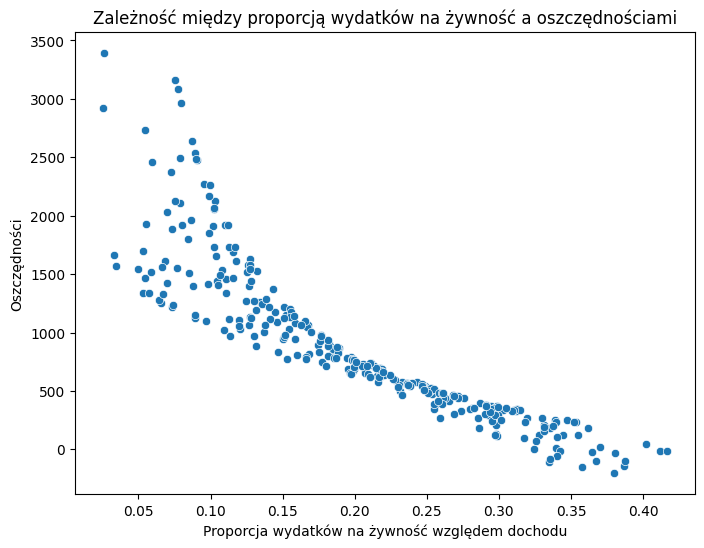

In [299]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='proporcja_wydatkow', y='oszczednosci', data=data)
plt.title('Zależność między proporcją wydatków na żywność a oszczędnościami')
plt.xlabel('Proporcja wydatków na żywność względem dochodu')
plt.ylabel('Oszczędności')
plt.show()

##### Analiza

Patrząc na wykres rozrzutu, możemy zauważyć kilka rzeczy:
- **Brak wyraźnej liniowości**: Punkty na wykresie nie układają się wzdłuż linii prostej. Zamiast tego, widzimy raczej kształt przypominający krzywą. Sugeruje to, że zależność między proporcją wydatków na żywność a oszczędnościami może być nieliniowa.
- **Losowość**: Punkty na wykresie wydają się rozrzucone dość losowo, bez wyraźnych skupisk lub wzorców. To sugeruje, że założenie o losowości próby jest prawdopodobnie spełnione.
- **Monotoniczność**: na wykresie widać, że wraz ze wzrostem proporcji wydatków na żywność, oszczędności generalnie maleją. Zależność nie jest idealnie liniowa, ale wyraźnie monotoniczna.

##### Wnioski

- Wykres sugeruje, że założenie o liniowości zależności nie jest spełnione. W takiej sytuacji, test korelacji Pearsona może nie być najlepszym narzędziem do badania zależności między tymi zmiennymi.
- Założenie o monotoniczności dla testu korelacji Spearmana jest spełnione. Możemy więc bezpiecznie przeprowadzić ten test.

#### Założenia
- **Losowość próby**: Zakładamy, że dane pochodzą z losowej próby.
- **Monotoniczność**: Zakładamy, że istnieje monotoniczna zależność między zmiennymi, co oznacza, że wzrost jednej zmiennej jest zawsze związany ze wzrostem lub spadkiem drugiej zmiennej, ale niekoniecznie w sposób liniowy.

#### Komentarz do założeń

*zbędny po dokładnej analizie danych :)*

#### Przeprowadzenie testu:

In [300]:
from scipy.stats import spearmanr

data['proporcja_wydatkow'] = data['wydatki_zyw'] / data['dochod']

correlation, p_value = spearmanr(data['proporcja_wydatkow'], data['oszczednosci'])

print(f'Korelacja Spearmana: {correlation:.3f}')
print(f'p-value: {p_value:.3f}')

Korelacja Spearmana: -0.973
p-value: 0.000


#### Interpretacja wyniku


- **Korelacja Spearmana**: -0.973 wskazuje na **bardzo silną ujemną monotoniczną zależność** między proporcją wydatków na żywność a oszczędnościami. Im większa proporcja dochodu przeznaczana na żywność, tym mniejsze oszczędności.
- **p-value**: 0.000 jest **znacznie mniejsze od naszego poziomu istotności** (0.01). Oznacza to, że możemy odrzucić hipotezę zerową o braku monotonicznej zależności.

#### Konkluzja

Na podstawie testu korelacji Spearmana, możemy stwierdzić, że istnieje bardzo silna, istotna statystycznie, ujemna monotoniczna zależność między proporcją wydatków na żywność a oszczędnościami. 

Osoby przeznaczające większą część swoich dochodów na żywność mają tendencję do posiadania mniejszych oszczędności.

### 3. Czy średnia waga kobiet w próbie jest wyższa niż 56 kg?


- **H0**: Średnia waga kobiet jest równa 56 kg.
- **H1**: Średnia waga kobiet jest większa niż 56 kg.

#### Wybór testu i uzasadnienie

##### Analiza histogram wagi kobiet

##### Wykres

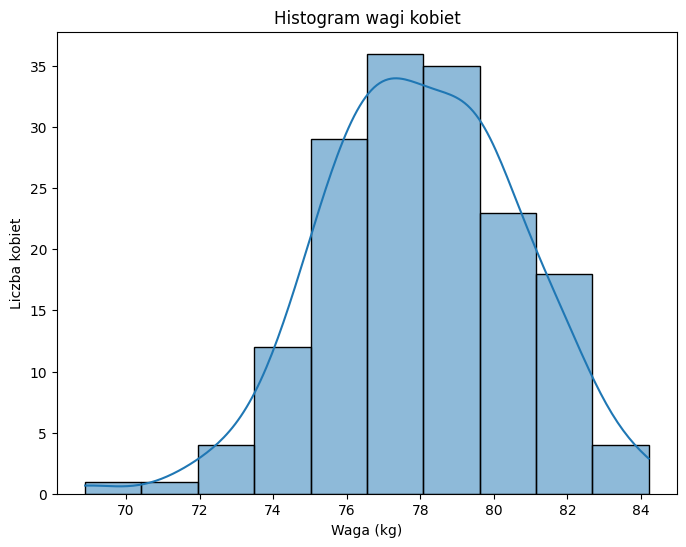

In [301]:
plt.figure(figsize=(8, 6))
sns.histplot(data[data['plec'] == 1]['waga'], bins=10, kde=True)
plt.title('Histogram wagi kobiet')
plt.xlabel('Waga (kg)')
plt.ylabel('Liczba kobiet')
plt.show()

##### Analiza

Analizując histogram wagi kobiet, możemy zauważyć:
- **Rozkład w przybliżeniu normalny**: Histogram przypomina kształtem krzywą dzwonową, co sugeruje, że rozkład wagi kobiet jest w przybliżeniu normalny.
- **Duża próba**: Na osi Y widzimy, że liczba kobiet w próbie przekracza 150. To zdecydowanie duża próba (n > 30), co pozwala nam zastosować Centralne Twierdzenie Graniczne.
- **Brak wyraźnych wzorców**: Rozkład wagi wydaje się być dość naturalny, bez nietypowych przerw lub skupisk. To sugeruje, że próbka może być losowa.

##### Wnioski


Na podstawie analizy histogramu możemy stwierdzić, że założenia o losowości próby i normalności rozkładu lub dużej próbie są prawdopodobnie spełnione. Możemy zatem bezpiecznie przeprowadzić jednostronny test t-Studenta dla jednej próby, aby sprawdzić, czy średnia waga kobiet w próbie jest wyższa niż 56 kg.

#### Założenia

- Losowość próby
- Normalność rozkładu wagi kobiet lub **wystarczająco duża próba (n>30)**

#### Komentarz do założeń

*zbędny po dokładnej analizie danych :)*

#### Przeprowadzenie testu

In [302]:
from scipy.stats import ttest_1samp

women_weight = data[data['plec'] == 1]['waga']

statistic, p_value = ttest_1samp(women_weight, popmean=56, alternative='greater')

print(f'Statystyka testowa: {statistic:.3f}')
print(f'p-value: {p_value:.3f}')

Statystyka testowa: 107.029
p-value: 0.000


#### Interpretacja wyniku

Otrzymaliśmy jednoznaczny wynik testu t-Studenta!
- Statystyka testowa: 107.029 jest bardzo duża, co sugeruje, że średnia waga kobiet w próbie znacząco odbiega od 56 kg.
- p-value: 0.000 jest znacznie mniejsze od naszego poziomu istotności (0.01).

#### Konkluzja


Na podstawie jednostronnego testu t-Studenta, możemy z całą pewnością odrzucić hipotezę zerową i stwierdzić, że średnia waga kobiet w próbie jest istotnie statystycznie większa niż 56 kg.

## Zadanie 7

> Przeprowadź badanie wysokości wydatków na żywność z wykorzystaniem zmiennych z bazy.
> Przyjmij poziom istotności α = 0.01. W tym celu:
> - Oszacuj wstępny model zawierający wszystkie zmienne z oryginalnej bazy (poza id) oraz stałą, gdzie zmienna wydatki_zyw jest zmienną objaśnianą. Pamiętaj o rozkodowaniu zmiennych jakościowych. (0,5pkt)
> - Skomentuj R2, testy łącznej i indywidualnej istotności we wstępnym modelu. (1pkt)
> - Sprawdź, czy wstępny model spełnia założenia Klasycznego Modelu Regresji Liniowej (KMRL). Zwróć szczególną uwagę na kwestie liniowości formy funkcyjnej, homoskedastyczności i braku autokorelacji składnika losowego oraz rozkładu składnika losowego. (2pkt)
> - Sprawdź, czy we wstępnym modelu występuje problem niedokładnej współliniowości (multicollinearity) (0,5pkt)
> - Korzystając z analizy obserwacji odstających dla wstępnego modelu, sprawdź, czy baza zawiera błędy.
> 
> Jeśli znajdziesz podejrzane obserwacje, zdecyduj i uzasadnij, co z nimi zrobisz. (1pkt)
> - Popraw model tak, aby spełniał jak najwięcej założeń KMRL. Opisz kroki podjęte do otrzymania “najlepszego” modelu (4pkt).
> 
> Wskazówka: Rozważ różne formy funkcyjne oraz transformacje zmiennych.
> - Przedstaw ilościową interpretację wybranych dwóch indywidualnie istotnych współczynników w “najlepszym” modelu. Pamiętaj, że stałej nie interpretuje się. Zalecany wybór zmiennych niepoddanych transformacji. (1pkt)
> - Jakie są opisowe charakterystyki osób, które cechują wydatki na żywność należące do górnych 10% predykcji wydatków na żywność w Państwa “najlepszym” modelu? Sprawdź i przedyskutuj (2pkt).


### 1. Oszacowanie wstępnego modelu

In [303]:
import pandas as pd
import statsmodels.formula.api as smf

data = pd.get_dummies(data, columns=['plec', 'jednoos', 'miejsce'], drop_first=True)
formula = 'wydatki_zyw ~ waga + wzrost + dzieci + wiek + dochod + oszczednosci + plec_2 + jednoos_1 + miejsce_2 + miejsce_3'
model = smf.ols(formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     61.90
Date:                Mon, 13 May 2024   Prob (F-statistic):           2.51e-66
Time:                        09:38:44   Log-Likelihood:                -1488.6
No. Observations:                 304   AIC:                             2999.
Df Residuals:                     293   BIC:                             3040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           226.2224     90.95

### 2. Komentarz do R2, testów istotności

- **R-squared (R²) = 0.679**: Oznacza to, że nasz model wyjaśnia 67.9% zmienności wydatków na żywność. To dość wysoka wartość, ale nie oznacza to, że model jest idealny.
- **Adjusted R-squared = 0.668**: Ta wartość uwzględnia liczbę zmiennych w modelu. Jest nieco niższa od R², co sugeruje, że niektóre zmienne mogą nie wnosić istotnego wkładu do modelu.
- **F-statistic = 61.90, Prob (F-statistic) = 2.51e-66**: Test F sprawdza hipotezę zerową, że wszystkie współczynniki w modelu są równe zero. W naszym przypadku, bardzo niska wartość p-value oznacza, że możemy odrzucić H0. Model jako całość jest istotny statystycznie.
- **Indywidualna istotność**: Zmienne dochod i oszczednosci mają p-value < 0.01, co oznacza, że są istotne statystycznie na poziomie istotności 0.01. Zmienne dzieci i wiek są istotne na poziomie 0.05. Pozostałe zmienne nie są istotne na poziomie 0.05.


### 3. Założenia KMRL

#### 3.1. Liniowość

##### Wykresy

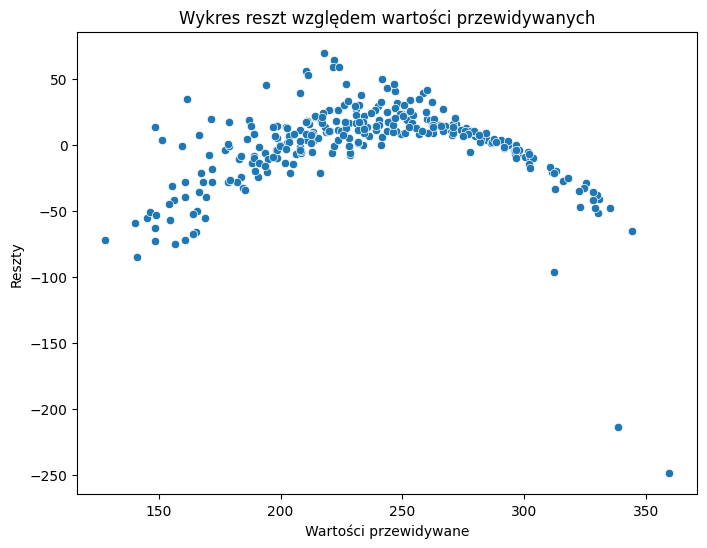

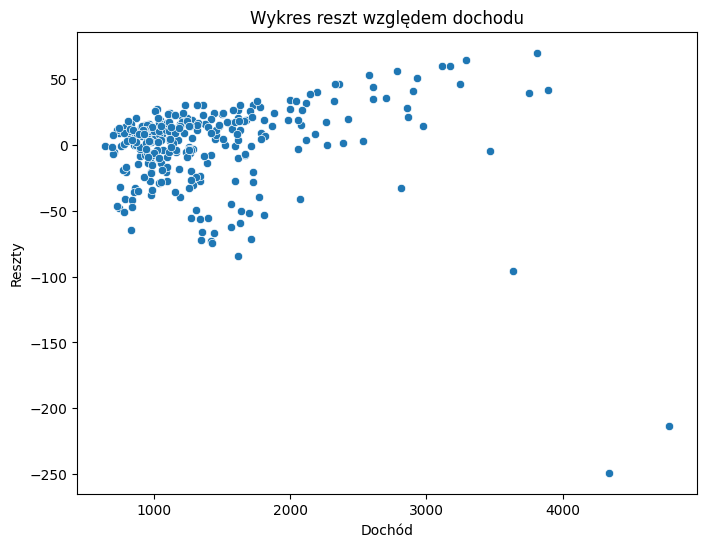

In [304]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.title('Wykres reszt względem wartości przewidywanych')
plt.xlabel('Wartości przewidywane')
plt.ylabel('Reszty')
plt.show()

# Wykresy reszt względem poszczególnych zmiennych
# (kod dla każdej zmiennej osobno, np.:)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['dochod'], y=model.resid)
plt.title('Wykres reszt względem dochodu')
plt.xlabel('Dochód')
plt.ylabel('Reszty')
plt.show()

##### Analiza

- Wykres reszt względem wartości przewidywanych: Widzimy wyraźny kształt "U", co sugeruje naruszenie założenia o liniowości. Zależność między resztami a wartościami przewidywanymi nie jest liniowa.
- Wykres reszt względem dochodu: Również na tym wykresie widoczny jest lekki kształt "U", co sugeruje problemy z liniowością zależności między wydatkami na żywność a dochodem.

#### 3.2. Homoskedastyczność

Na wykresie reszt względem wartości przewidywanych, wariancja reszt nie jest stała. Wraz ze wzrostem wartości przewidywanych, reszty wydają się być bardziej rozproszone, co sugeruje naruszenie założenia o homoskedastyczności.

#### 3.3. Brak autokorelacji składnika losowego

Wartość Durbina-Watsona (DW) = 2.101 jest bliska 2, co sugeruje brak autokorelacji.

#### 3.4. Rozkład normalny składnika losowego

##### Wykresy

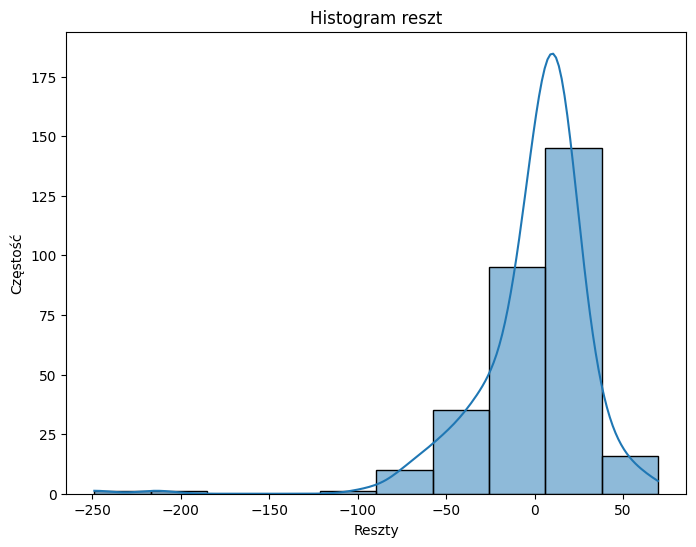

In [305]:
plt.figure(figsize=(8, 6))
sns.histplot(model.resid, bins=10, kde=True)
plt.title('Histogram reszt')
plt.xlabel('Reszty')
plt.ylabel('Częstość')
plt.show()

##### Analiza

Histogram reszt wskazuje na odstępstwa od rozkładu normalnego. Widzimy kilka outlierów po lewej stronie histogramu, a sam rozkład nie jest idealnie symetryczny.

#### 4. Niedokładna współliniowość (multicollinearity)

##### Variance Inflation Factor (VIF) dla każdej zmiennej objaśniającej.

In [306]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['plec_2', 'jednoos_1', 'miejsce_2', 'miejsce_3', 'waga', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor      features
0    2.388949        plec_2
1    4.158725     jednoos_1
2    2.748101     miejsce_2
3    2.058859     miejsce_3
4  627.707197          waga
5  743.923797        wzrost
6    3.299398        dzieci
7   71.645322          wiek
8   49.917711        dochod
9   31.020166  oszczednosci


##### Analiza wartości VIF


- Zmienne waga (VIF = 627.71) i wzrost (VIF = 743.92) mają bardzo **wysokie wartości VIF**, co wskazuje na silną multicollinearity.
- Zmienne wiek (VIF = 71.65), dochod (VIF = 49.92) i oszczednosci (VIF = 31.02) również mają wysokie wartości VIF, co sugeruje **problemy z multicollinearity**.

##### Wnioski

Wstępny model ma problem z silną multicollinearity, co może wpływać na stabilność oszacowań współczynników i interpretację modelu.

##### Rozwiązanie

In [323]:
from scipy.stats import boxcox

# Transform the dependent variable
data['bc_wydatki_zyw'], lambda_ = boxcox(data['wydatki_zyw'])

data['dochod_oszczednosci_diff_squared'] = (data['dochod'] - data['oszczednosci']) ** 2
data['dochod_oszczednosci'] = (data['dochod'] - data['oszczednosci'])
data['dochod_wiek'] = (data['dochod'] * data['wiek'])
formula = 'bc_wydatki_zyw ~ dochod_wiek + dochod_oszczednosci + dochod_oszczednosci_diff_squared + plec_2 + miejsce_2 + miejsce_3'

model = smf.ols(formula, data=data).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         bc_wydatki_zyw   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1011.
Date:                Mon, 13 May 2024   Prob (F-statistic):          2.43e-194
Time:                        09:49:59   Log-Likelihood:                -3874.4
No. Observations:                 304   AIC:                             7763.
Df Residuals:                     297   BIC:                             7789.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

#### Wnioski


- Istotne zmienne: dochod_oszczednosci i dochod_oszczednosci_diff_squared są bardzo istotne statystycznie - (p-value < 0.01), co wskazuje na silny związek z wydatkami na żywność. (dodanie kwadratu różnicy jest pomysłem z wykłądu). Pozwala to na uwzględnienie nieliniowej zależności zmiennych
- Wartości Omnibus i Jarque-Bera sugerują, że rozkład reszt jest bliższy normalnemu.
